In [17]:
import tensorflow as tf

In [18]:
# Define the image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [19]:
# Define the data augmentation pipeline for training data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.4,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.4,
    zoom_range=0.1,
    horizontal_flip=True
)

In [20]:
# Define the data augmentation pipeline for validation and test data (only rescaling)
val_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [21]:
# Load the training, validation, and test data
train_data = train_datagen.flow_from_directory(
    "dataset/Garbage classification/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

test_data = val_test_datagen.flow_from_directory(
    "dataset/Garbage classification/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

Found 1912 images belonging to 5 classes.
Found 477 images belonging to 5 classes.


In [22]:
t_img, label = train_data.next()

In [23]:
import matplotlib.pyplot as plt

In [24]:
def plotImages(t_img, label):
    for i, img in enumerate(t_img):

        if i <= 5:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.axis=False
            plt.show()

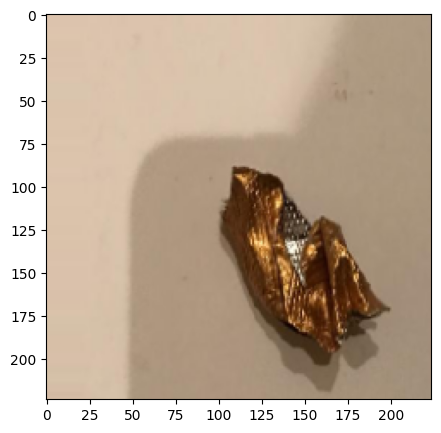

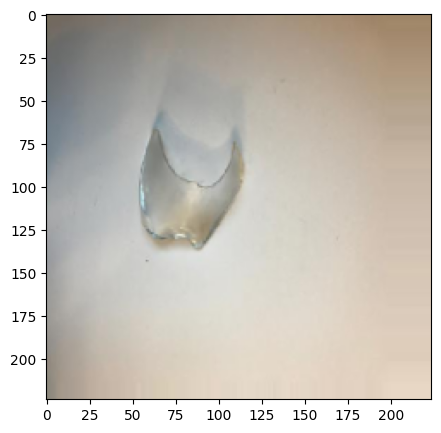

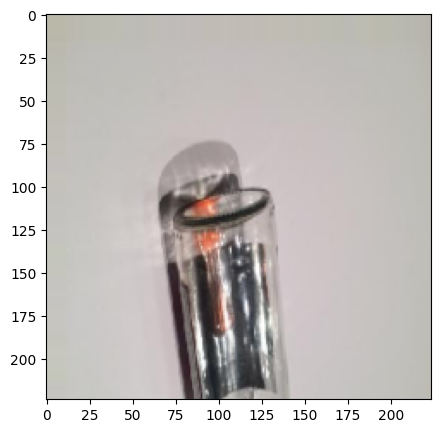

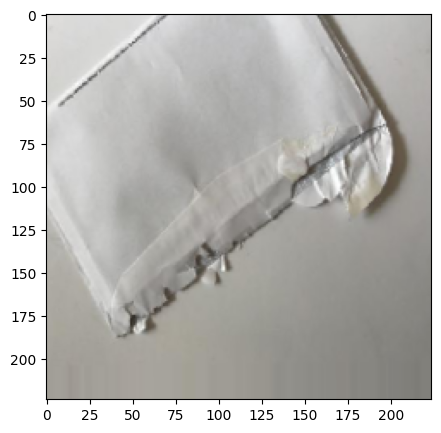

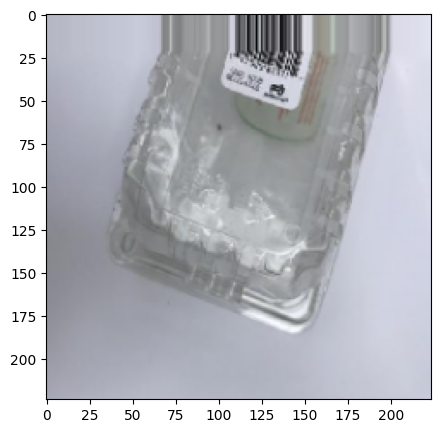

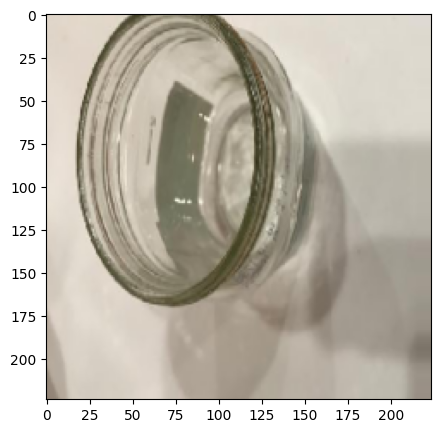

In [25]:
plotImages(t_img, label)

In [26]:
# Load a pre-trained model and fine-tune it on the garbage dataset
base_model = tf.keras.applications.ResNet50V2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")
for layer in base_model.layers:
    layer.trainable = False

x = tf.keras.layers.Flatten()
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(train_data.num_classes, activation="softmax")(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
# Define early stopping callback to monitor validation loss
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=20,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Epoch 1/20
60/60 [==============================] - 128s 2s/step - loss: 0.9218 - accuracy: 0.6695 - val_loss: 0.4461 - val_accuracy: 0.8176
Epoch 2/20
60/60 [==============================] - 119s 2s/step - loss: 0.6444 - accuracy: 0.7505 - val_loss: 0.4063 - val_accuracy: 0.8553
Epoch 3/20
60/60 [==============================] - 114s 2s/step - loss: 0.5877 - accuracy: 0.7856 - val_loss: 0.3704 - val_accuracy: 0.8679
Epoch 4/20
60/60 [==============================] - 102s 2s/step - loss: 0.5605 - accuracy: 0.8002 - val_loss: 0.3834 - val_accuracy: 0.8553
Epoch 5/20
60/60 [==============================] - 106s 2s/step - loss: 0.5009 - accuracy: 0.8164 - val_loss: 0.3241 - val_accuracy: 0.8700
Epoch 6/20
60/60 [==============================] - 109s 2s/step - loss: 0.4577 - accuracy: 0.8138 - val_loss: 0.3316 - val_accuracy: 0.8721
Epoch 7/20
60/60 [==============================] - 111s 2s/step - loss: 0.4259 - accuracy: 0.8431 - val_loss: 0.3418 - val_accuracy: 0.8763
Epoch 8/20
60

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [30]:
import matplotlib.pyplot as plt

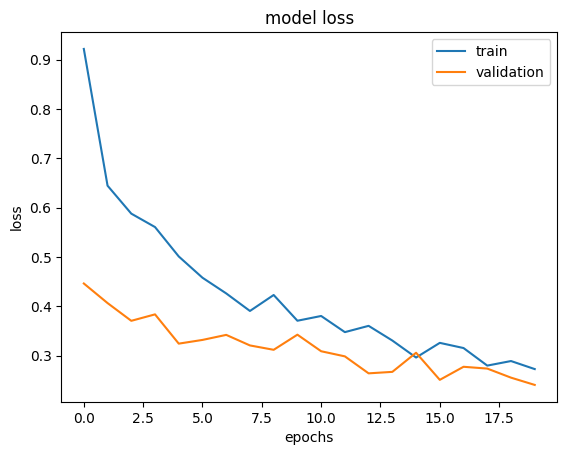

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.save('imageClassificationModel.h5')

In [ ]:
import tensorflowjs as tfjs

In [ ]:
tfjs.converters.save_keras_model(model, "./model_2/")